In [1]:
import numpy
import pandas
from matplotlib import pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [2]:
soccerData = pandas.read_csv('SoccerPlayerInfo.csv')

# Examining Soccer Player Data

In [3]:
allBMI = soccerData['BMI']
allValue = soccerData['Rating']
EPL = pandas.DataFrame(soccerData.loc[soccerData['League'] == 'EPL'])
f = pandas.DataFrame(soccerData.loc[soccerData['Position'] == 'Forward'])
fBMI = f['BMI']
m = pandas.DataFrame(soccerData.loc[soccerData['Position'] == 'Midfielder'])
mBMI = m['BMI']
d = pandas.DataFrame(soccerData.loc[soccerData['Position'] == 'Defender'])
dBMI = d['BMI']
g = pandas.DataFrame(soccerData.loc[soccerData['Position'] == 'Goalkeeper'])
gBMI = g['BMI']

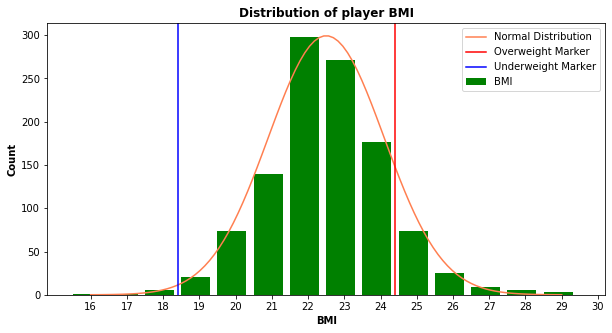

In [4]:
bins = numpy.arange(16, 31)
plt.figure(figsize = (10, 5))
plt.hist(allBMI, bins = bins, align = 'left', width = 0.8, color = 'green')
plt.xticks(bins)
plt.title('Distribution of player BMI', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.xlabel('BMI', fontweight = 'bold')

x = numpy.linspace(16, 29, 100)
y = scipy.stats.norm.pdf(x , 22.5, 1.6) * 1200
plt.plot(x, y, color = 'coral')
plt.axvline(24.4, color = 'red')
plt.axvline(18.4, color = 'blue')
plt.legend(['Normal Distribution', 'Overweight Marker', 'Underweight Marker', 'BMI'])

plt.show()

In [5]:
print('Soccer Player BMI Summary Statistics:', '\n', '\n', allBMI.describe())

Soccer Player BMI Summary Statistics: 
 
 count    1103.000000
mean       23.092809
std         1.600806
min        16.286924
25%        22.148708
50%        23.010315
75%        24.121901
max        29.856520
Name: BMI, dtype: float64


### There is approximately a normal distribution of player BMI, with a mean near 23. The sample is also quite concentrated and has low variability, with a standard deviation of 1.6. This means that according to this sample, over 90% of professional soccer players have a BMI of between 19.8 and 26.2 (within two standard deviations of the mean)

### Additionally and interestingly, despite general disdain for BMI as a measure of health, the vast majority of the sample is within the healthy weight range, or only barely into the overweight range. It will be interesting to see if this holds for baseball as well.

### Now, lets break the data down by position.

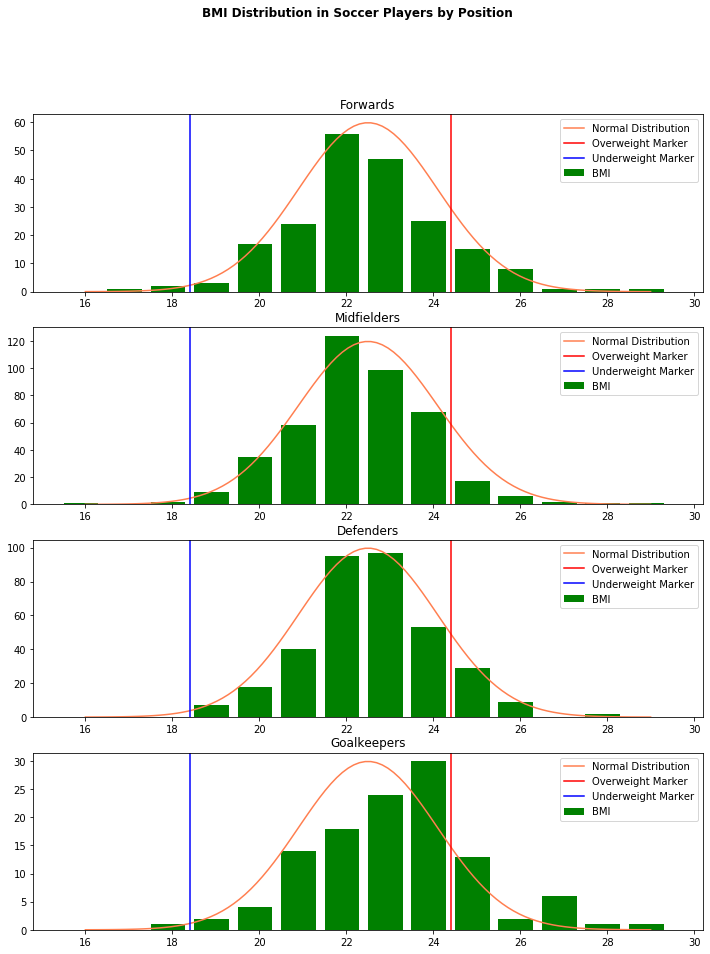

Forward Summary Satistics: 
 count    201.000000
mean      23.067704
std        1.727216
min       17.900463
25%       22.104360
50%       22.955102
75%       24.006757
max       29.418090
Name: BMI, dtype: float64 
 
 Midfielder Summary Statistics: 
 count    423.000000
mean      22.880058
std        1.546083
min       16.286924
25%       22.044766
50%       22.886999
75%       23.772947
max       29.856520
Name: BMI, dtype: float64 
 
 Defender Summary Statistics: count    350.000000
mean      23.166944
std        1.458521
min       19.384448
25%       22.237755
50%       23.053627
75%       24.135271
max       28.628378
Name: BMI, dtype: float64 
 
 Goalkeeper Summary Statistics: count    116.000000
mean      23.733001
std        1.844123
min       18.101351
25%       22.511336
50%       23.750000
75%       24.482127
max       29.494756
Name: BMI, dtype: float64


In [6]:
fig, (fwds, mids, defs, gks) = plt.subplots(4, figsize = (12, 15))
fig.suptitle('BMI Distribution in Soccer Players by Position', fontweight = 'bold')

fwds.hist(fBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

mids.hist(mBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

defs.hist(dBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

gks.hist(gBMI, bins = bins, align = 'left', width = 0.8, color = 'green')



fwds.plot(x, y/5, color = 'coral')
fwds.title.set_text('Forwards')
fwds.axvline(24.4, color = 'red')
fwds.axvline(18.4, color = 'blue')
fwds.legend(['Normal Distribution', 'Overweight Marker', 'Underweight Marker', 'BMI'])

mids.plot(x, y/2.5, color = 'coral')
mids.title.set_text('Midfielders')
mids.axvline(24.4, color = 'red')
mids.axvline(18.4, color = 'blue')
mids.legend(['Normal Distribution', 'Overweight Marker', 'Underweight Marker', 'BMI'])

defs.plot(x, y/3, color = 'coral')
defs.title.set_text('Defenders')
defs.axvline(24.4, color = 'red')
defs.axvline(18.4, color = 'blue')
defs.legend(['Normal Distribution', 'Overweight Marker', 'Underweight Marker', 'BMI'])

gks.plot(x, y/10, color = 'coral')
gks.title.set_text('Goalkeepers')
gks.axvline(24.4, color = 'red')
gks.axvline(18.4, color = 'blue')
gks.legend(['Normal Distribution', 'Overweight Marker', 'Underweight Marker', 'BMI'])



plt.show()

print('Forward Summary Satistics:', '\n', fBMI.describe(), '\n', '\n', \
      'Midfielder Summary Statistics:','\n', mBMI.describe(),\
      '\n', '\n', 'Defender Summary Statistics:', dBMI.describe(),\
      '\n', '\n', 'Goalkeeper Summary Statistics:', gBMI.describe())

### Except for Goalkeepers, even breaking down by position, there is approximately a normal distribution centered between 22 and 23. The graphs and summary statistics also show similar standard deviations. From this exploration, we can conclude that there is not a significant correlation between player BMI and position. Goalkeepers however, while the mean and range are similar to the other positions, and a similarly low standard deviation exists, the distribution is skewed to the left. Higher BMI is a bit more common among goalkeepers than other positions.

## Looking at the relationship between BMI and player rating

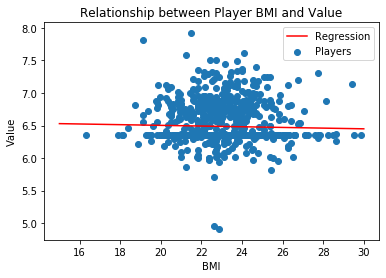

Slope: [-0.00530801] 
 Correlation: -0.029987403299501603


In [7]:
model = LinearRegression()
x = soccerData[['BMI']]
y = allValue
model.fit(x, y)

plt.scatter(x, y)
plt.ylabel('Value')
plt.xlabel('BMI')
p = numpy.linspace(15,30,1000)
q = model.coef_*p+model.intercept_
plt.plot(p, q, color = 'red')
plt.legend(['Regression', 'Players'])
plt.title('Relationship between Player BMI and Value')
plt.show()
print('Slope:', model.coef_, '\n', \
      'Correlation:', numpy.corrcoef(soccerData['BMI'],y)[0,1])

## The scatterplot seems to show no real relationship between player Rating and BMI, and the regression line confirms the suspicion. Now lets do the same thing, except filtering by position.

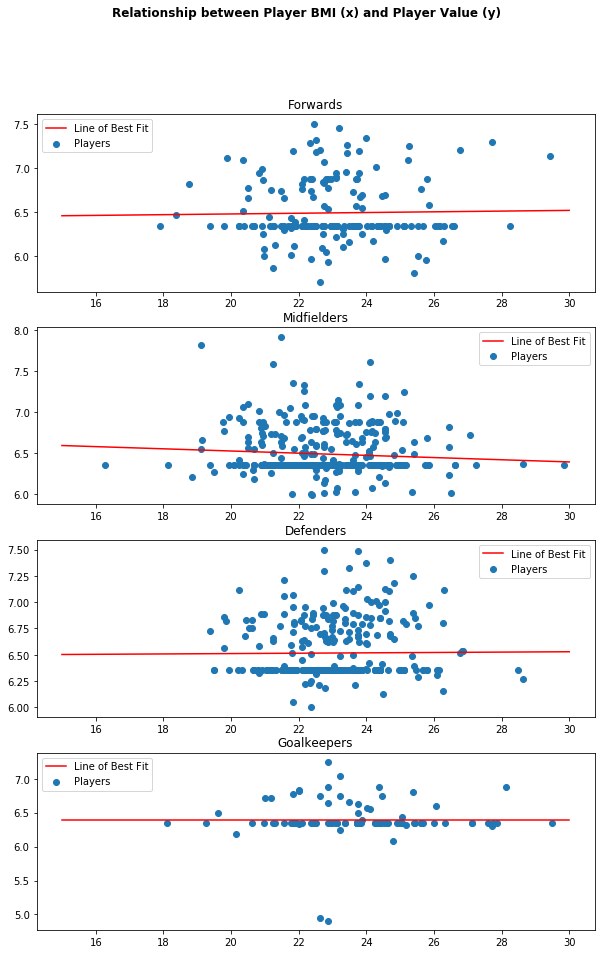

Forward Slope: [0.00404819] 
 Forward Correlation: 0.021018782658793998 

Midfielder Slope: [-0.01333051] 
 Midfielder Correlation: -0.07513436110945122 

Defender Slope: [0.00174173] 
 Defender Correlation: 0.009485430839455333 

Goalkeeper Slope: [2.17770868e-05] 
 GoalKeeper Correlation: 0.00015167685076347733 



In [8]:
p = numpy.linspace(15,30,1000)
fx = f[['BMI']]
fy = f['Rating']
model.fit(fx, fy)
fwdx, fwdb = model.coef_, model.intercept_

mx = m[['BMI']]
my = m['Rating']
model.fit(mx, my)
midx, midb = model.coef_, model.intercept_

dx = d[['BMI']]
dy = d['Rating']
model.fit(dx, dy)
defx, defb = model.coef_, model.intercept_

gx = g[['BMI']]
gy = g['Rating']
model.fit(gx, gy)
gkx, gkb = model.coef_, model.intercept_

fig, (fwds, mids, defs, gks) = plt.subplots(4, figsize = (10, 15))
fig.suptitle('Relationship between Player BMI (x) and Player Value (y)', fontweight = 'bold')

fwds.scatter(fx, fy)
fwds.plot(p, fwdx*p+fwdb, color = 'red')
fwds.title.set_text('Forwards')

mids.scatter(mx, my)
mids.plot(p, midx*p+midb, color = 'red')
mids.title.set_text('Midfielders')

defs.scatter(dx, dy)
defs.plot(p, defx*p+defb, color = 'red')
defs.title.set_text('Defenders')

gks.scatter(gx, gy)
gks.plot(p, gkx*p+gkb, color = 'red')
gks.title.set_text('Goalkeepers')


fwds.legend(['Line of Best Fit', 'Players'])
mids.legend(['Line of Best Fit', 'Players'])
defs.legend(['Line of Best Fit', 'Players'])
gks.legend(['Line of Best Fit', 'Players'])

plt.show()

print('Forward Slope:', fwdx, '\n', \
      'Forward Correlation:', numpy.corrcoef(f['BMI'],fy)[0,1], '\n')
print('Midfielder Slope:', midx, '\n', \
      'Midfielder Correlation:', numpy.corrcoef(m['BMI'],my)[0,1], '\n')
print('Defender Slope:', defx, '\n', \
      'Defender Correlation:', numpy.corrcoef(d['BMI'],dy)[0,1], '\n')
print('Goalkeeper Slope:', gkx, '\n', \
      'GoalKeeper Correlation:', numpy.corrcoef(g['BMI'],gy)[0,1], '\n')

## It seems that BMI does have a significant relationship with player value when filtering by position. All the plots visually indicate this, and calculated slopes and correlation coefficients confirm this intuition.